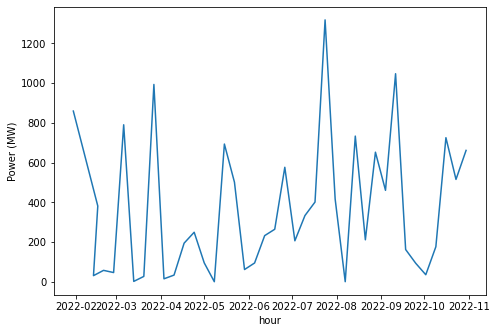

In [26]:
#read curtailment data
import pandas as pd
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
curtailed_data=pd.read_excel('curtailment data.xlsx')
ax.plot(curtailed_data['Date'],curtailed_data['Curtailment (MWh)'])
curtailed_data.index = pd.to_datetime(curtailed_data['Date'])
curtailed_data=curtailed_data.groupby(curtailed_data.index.hour).sum().round(1)
curtailed_data
plt.xlabel('Hour')
plt.ylabel('Power (MW)')
plt.show()

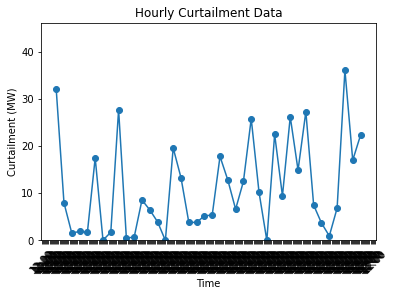

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Read the CSV file into a pandas dataframe
curtailed_data = pd.read_excel('hourly curtailment data.xlsx')

# Convert the 'Time' column to a datetime object
curtailed_data['Time'] = pd.to_datetime(curtailed_data['Time'])

# Create a figure and axis object for plotting
fig, ax = plt.subplots()

# Set the x-axis label and ticks
ax.set_xlabel('Time')
ax.xaxis.set_major_locator(mdates.HourLocator(interval=24))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))

# Set the y-axis label and limits
ax.set_ylabel('Curtailment (MW)')
ax.set_ylim(bottom=0, top=max(curtailed_data['Curtailment\n']) + 10)

# Plot the hourly curtailment data against time as a line plot
ax.plot(curtailed_data['Time'], curtailed_data['Curtailment\n'], marker='o')

# Rotate the x-tick labels for better visibility
plt.xticks(rotation=45)

# Set the title of the plot
ax.set_title('Hourly Curtailment Data')

# Show the plot
plt.show()



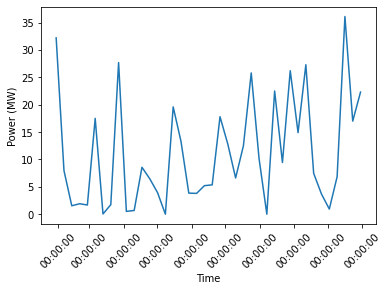

In [24]:
#read curtailment hourly data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Read the CSV file into a pandas dataframe
curtailed_data = pd.read_excel('hourly curtailment data.xlsx')

# Convert the 'Time' column to datetime format
curtailed_data['Time'] = pd.to_datetime(curtailed_data['Time'], format='%Y-%m-%d %H:%M:%S')

# Create a figure and axis object for plotting
fig, ax = plt.subplots()

# Plot the curtailment data as a line graph
ax.plot(curtailed_data['Time'], curtailed_data['Curtailment\n'])

# Set the x-label and y-label for the plot
ax.set_xlabel('Time')
ax.set_ylabel('Power (MW)')

# Set the x-tick labels to display the time only
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))

# Rotate the x-tick labels for better visibility
plt.xticks(rotation=45)

# Show the plot
plt.show()

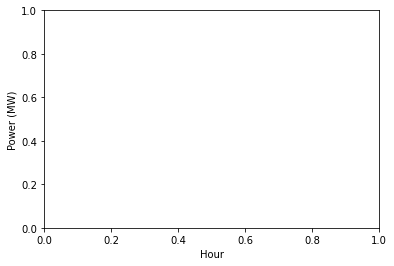

In [29]:
#read curtailment hourly data
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.dates as mdates

# Read the CSV file into a pandas dataframe
curtailed_data = pd.read_excel('hourly curtailment data.xlsx')
ax.plot(curtailed_data['Time'],curtailed_data['Curtailment\n'])
curtailed_data.index = pd.to_datetime(curtailed_data['Time'])
curtailed_data
plt.xlabel('Hour')
plt.ylabel('Power (MW)')
plt.show()

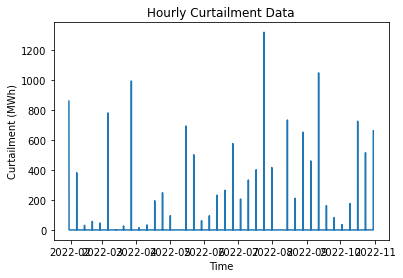

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a pandas dataframe
df = pd.read_csv('curtailment_data.csv')

# Convert the 'Time' column to a datetime format and set it as the index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Resample the data at hourly intervals and sum the values for each hour
hourly_data = df.resample('H').sum()

# Plot the data
plt.plot(hourly_data.index, hourly_data['CURTAILMENT\n'])
plt.xlabel('Time')
plt.ylabel('Curtailment (MWh)')
plt.title('Hourly Curtailment Data')
plt.show()


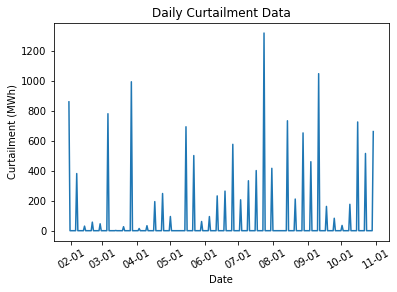

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter

# Read the data into a pandas dataframe
df = pd.read_csv('curtailment_data.csv')

# Convert the 'Time' column to a datetime format and set it as the index
df['Time'] = pd.to_datetime(df['Time'])
df.set_index('Time', inplace=True)

# Resample the data at daily intervals and sum the values for each day
daily_data = df.resample('D').sum()

# Plot the data as a line chart
fig, ax = plt.subplots()
ax.plot_date(daily_data.index, daily_data['CURTAILMENT\n'], linestyle='solid', marker=None)

# Set the x-axis format to show only the date
date_form = DateFormatter("%m-%d")
ax.xaxis.set_major_formatter(date_form)
ax.xaxis.set_tick_params(rotation=30, labelsize=10)

# Set the axis labels and title
plt.xlabel('Date')
plt.ylabel('Curtailment (MWh)')
plt.title('Daily Curtailment Data')

plt.show()



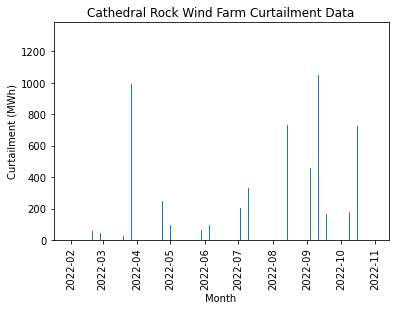

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data into a pandas dataframe
df = pd.read_csv('curtailment_data.csv')

# Convert the 'Time' column to a datetime format
df['Time'] = pd.to_datetime(df['Time'])

# Group the data by date
grouped_data = df.groupby(df['Time'].dt.date).sum()

# Create a bar chart
plt.bar(grouped_data.index, grouped_data['CURTAILMENT\n'], width=0.4)
plt.xlabel('Month')
plt.ylabel('Curtailment (MWh)')
plt.title('Cathedral Rock Wind Farm Curtailment Data')
plt.xticks(rotation=90)
plt.show()


In [2]:
#PV grid
import pandas as pd
PV_grid=pd.read_csv("Mangalo_Project_VC0_HourlyRes_0.csv", skiprows=12, usecols=[0,1], header = None, skipfooter = 1, engine = 'python')
PV_grid.columns=['Datetime','E_grid']
PV_grid.index = pd.to_datetime(PV_grid['Datetime'])
PV_grid.dropna()
PV_grid.drop('Datetime', axis = 1, inplace = True)
PV_grid=PV_grid[['E_grid']].groupby(PV_grid.index.month).sum().round(1)/1000
PV_grid

,E_grid
Datetime,
1.0,1090.0423
2.0,958.9515
3.0,1003.7063
4.0,899.0607
5.0,827.8578
6.0,846.8066
7.0,844.9441
8.0,938.5798
9.0,1056.8620


In [3]:
#wind power dispatch generation
import pandas as pd
import numpy as np
import time
import glob
filenames = sorted(glob.glob('NEMLOG*.csv'))
filenames = filenames[0:2]
data = pd.concat([pd.read_csv(f, skipfooter = 1, engine='python') for f in filenames])
data.columns=['Datetime','DISPATCH VALUE (MW)']
data.index = pd.to_datetime(data['Datetime'])
data=data[['DISPATCH VALUE (MW)']].groupby(data.index.month).sum().round(1)
data

,DISPATCH VALUE (MW)
Datetime,
1,253113.4
2,266925.7
3,262371.0
4,292724.7
5,217739.4
6,609271.9
7,321721.9
8,326299.8
9,283711.8


In [4]:
import matplotlib.pyplot as plt
new=pd.concat([curtailed_data, data, PV_grid['E_grid']], axis=1)
new.columns=['Curtailment (MW)','Wind power dispatch (MW)', 'PV_grid (MW)']
new['PV_grid (MW)'] = new['PV_grid (MW)'].replace(-0.0001, 0)
new=new.fillna(0)
print(new)

      Curtailment (MW)  Wind power dispatch (MW)  PV_grid (MW)
1.0              859.0                  253113.4     1090.0423
2.0              514.7                  266925.7      958.9515
3.0             1811.3                  262371.0     1003.7063
4.0              490.9                  292724.7      899.0607
5.0             1350.0                  217739.4      827.8578
6.0             1166.3                  609271.9      846.8066
7.0             2674.0                  321721.9      844.9441
8.0             1596.1                  326299.8      938.5798
9.0             1761.9                  283711.8     1056.8620
10.0            2112.1                  298860.0     1085.4799
11.0               0.0                  317742.1     1046.0353
12.0               0.0                  255592.2     1061.2279


In [5]:
corr = new.corr(method='pearson')
corr

,Curtailment (MW),Wind power dispatch (MW),PV_grid (MW)
Curtailment (MW),1.000000,0.067684,-0.242549
Wind power dispatch (MW),0.067684,1.000000,-0.371196
PV_grid (MW),-0.242549,-0.371196,1.000000


In [6]:
#GHI
import numpy as np
import pandas as pd
import time
import glob
filenames = sorted(glob.glob('20*.csv'))
filenames = filenames[0:21]
#for f in filenames:
data1 = pd.concat([pd.read_csv(f, usecols=[1,2],skiprows = 4, header = None, skipfooter = 1, engine='python') for f in filenames])
data1.columns=['Datetime','GHI (W/m2)']
data1.index = pd.to_datetime(data1['Datetime'])
data1=data1[['GHI (W/m2)']].groupby(data1.index.month).sum().round(1)
data1

,GHI (W/m2)
Datetime,
1,5320967.0
2,4381148.0
3,3901217.2
4,2749860.3
5,2041611.6
6,1643341.4
7,1863855.3
8,2484980.7
9,3317654.2


In [7]:
#wind power tranposition
%matplotlib inline
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cm
from math import pi
df=pd.read_csv('HM01X_Data_018116_999999999907064.txt', usecols = ['Year Month Day Hour Minutes in YYYY.1', 'MM.1', 'DD.1', 'HH24.1',
       'MI format in Local standard time', 'Air Temperature in degrees C', 'Wind speed in km/h', 'Wind direction in degrees true'], low_memory=False)
df = df.apply(pd.to_numeric, errors = 'coerce')
df.columns =["year", "month", "day", "hour", "minute", "Temp", "WS", "WD"]
df.interpolate(method='polynomial', order=2)
df[(df['WS'] > 3)]
df.index = pd.to_datetime(df[['year', 'month', 'day', 'hour', 'minute']])
ave=df[['WS']].groupby(df.index.month).mean().round(1)/3.6
mean_WS=df.WS/3.6
ave1 = mean_WS.loc[mean_WS > 3]
####
z=100
z_0=0.1
z_ref=10
v_hub = ave1*np.log(z/z_0)/np.log(z_ref/z_0)
P_A = 1/2 *1.2 *(v_hub**3)/pow((0.568 + 0.433/2.22),(-3/2.22)) 
###
ave1.groupby(ave1.index.hour).mean()
P_A.groupby(P_A.index.hour).mean()

0     317.077032
1     326.698648
2     344.293309
3     357.269182
4     368.344681
5     380.419722
6     401.631120
7     454.352026
8     525.427330
9     571.661191
10    590.210829
11    596.475564
12    604.392862
13    599.711725
14    602.154031
15    593.842433
16    561.703524
17    499.712546
18    414.321997
19    321.590975
20    287.195456
21    299.053347
22    300.566970
23    309.381956
Name: WS, dtype: float64

In [8]:
df1=pd.concat([ave1, v_hub, P_A], axis=1, join='inner')
df1.columns=['WS at 10 (m)','WS at 100 (m)','Wind Power potential (W/m2)']
df1.index.name = 'Month'
df1=df1.groupby(df1.index.month).sum().round(1)
df1

,WS at 10 (m),WS at 100 (m),Wind Power potential (W/m2)
Month,,,
1,139479.5,209219.2,10375778.3
2,115576.8,173365.2,7967820.6
3,119852.2,179778.2,7919542.2
4,104378.6,156567.9,6775225.8
5,114884.3,172326.5,8451283.7
6,105242.9,157864.3,7975893.6
7,128418.7,192628.1,10791176.8
8,131912.1,197868.2,11225679.6
9,128944.4,193416.6,11041767.4


In [31]:
import matplotlib.pyplot as plt
comb=pd.concat([curtailed_data, data, PV_grid['E_grid']], axis=1)
comb.columns=['Curtailment (MW)','Wind_grid (MW)', 'PV_grid (MW)']
comb['PV_grid (MW)'] = comb['PV_grid (MW)'].replace(-0.0001, 0)
comb=comb.fillna(0)
month=['Jan','Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
comb.insert(0,'Month',month)
comb

,Month,Curtailment (MW),Wind_grid (MW),PV_grid (MW)
1.0,Jan,859.0,253113.4,1090.0423
2.0,Feb,514.7,266925.7,958.9515
3.0,March,1811.3,262371.0,1003.7063
4.0,Apr,490.9,292724.7,899.0607
5.0,May,1350.0,217739.4,827.8578
6.0,Jun,1166.3,609271.9,846.8066
7.0,Jul,2674.0,321721.9,844.9441
8.0,Aug,1596.1,326299.8,938.5798
9.0,Sep,1761.9,283711.8,1056.8620
10.0,Oct,2112.1,298860.0,1085.4799


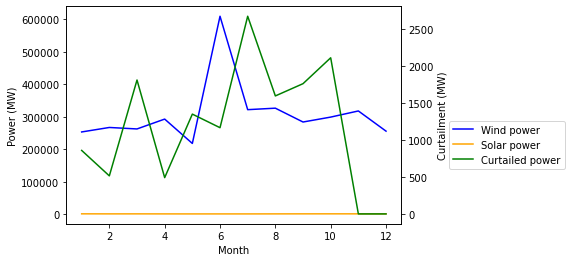

In [32]:
import matplotlib.pyplot as plt
# Create Plot
fig, ax1 = plt.subplots() 
ax1.set_xlabel('Month') 
ax1.set_ylabel('Power (MW)') 
plot_1 = ax1.plot(comb['Wind_grid (MW)'], color = 'blue',label="Wind power") 
plot_3 = ax1.plot(comb['PV_grid (MW)'], color = 'orange',label="Solar power") 
ax1.tick_params(axis ='y')
# Adding Twin Axes
ax2 = ax1.twinx() 
ax2.set_ylabel('Curtailment (MW)') 
plot_2 = ax2.plot(comb['Curtailment (MW)'], color = 'green', label="Curtailed power") 
ax2.tick_params(axis ='y') 
fig.legend(loc='upper left', bbox_to_anchor=(1.0, 0.5))

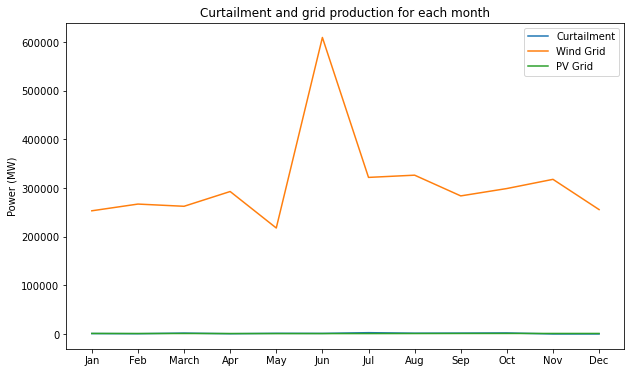

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
curtailment = [859.0, 514.7, 1811.3, 490.9, 1350.0, 1166.3, 2674.0, 1596.1, 1761.9, 2112.1, 0.0, 0.0]
wind_grid = [253113.4, 266925.7, 262371.0, 292724.7, 217739.4, 609271.9, 321721.9, 326299.8, 283711.8, 298860.0, 317742.1, 255592.2]
pv_grid = [1090.0423, 958.9515, 1003.7063, 899.0607, 827.8578, 846.8066, 844.9441, 938.5798, 1056.8620, 1085.4799, 1046.0353, 1061.2279]

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# X-axis
x = np.arange(len(months))

# Plot the data
ax.plot(x, curtailment, label='Curtailment')
ax.plot(x, wind_grid, label='Wind Grid')
ax.plot(x, pv_grid, label='PV Grid')

# Set the tick labels
ax.set_xticks(x)
ax.set_xticklabels(months)

# Set the y-axis label
ax.set_ylabel('Power (MW)')

# Add a title
ax.set_title('Curtailment and grid production for each month')

# Add a legend
ax.legend()

# Show the plot
plt.show()


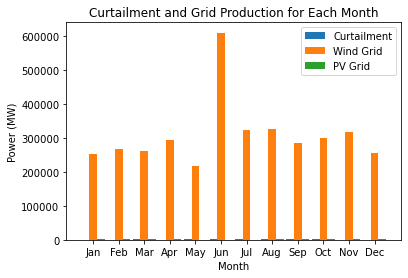

In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Data for the table
data = {
    'Jan': [859.0, 253113.4, 1090.0423],
    'Feb': [514.7, 266925.7, 958.9515],
    'Mar': [1811.3, 262371.0, 1003.7063],
    'Apr': [490.9, 292724.7, 899.0607],
    'May': [1350.0, 217739.4, 827.8578],
    'Jun': [1166.3, 609271.9, 846.8066],
    'Jul': [2674.0, 321721.9, 844.9441],
    'Aug': [1596.1, 326299.8, 938.5798],
    'Sep': [1761.9, 283711.8, 1056.8620],
    'Oct': [2112.1, 298860.0, 1085.4799],
    'Nov': [0.0, 317742.1, 1046.0353],
    'Dec': [0.0, 255592.2, 1061.2279]
}

# Extracting the data
curtailment = [data[month][0] for month in data]
wind = [data[month][1] for month in data]
pv = [data[month][2] for month in data]
months = list(data.keys())

# Plotting the data
x = np.arange(len(months))
width = 0.3

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, curtailment, width, label='Curtailment')
rects2 = ax.bar(x, wind, width, label='Wind Grid')
rects3 = ax.bar(x + width, pv, width, label='PV Grid')

# Adding labels and titles
ax.set_xlabel('Month')
ax.set_ylabel('Power (MW)')
ax.set_title('Curtailment and Grid Production for Each Month')
ax.set_xticks(x)
ax.set_xticklabels(months)
ax.legend()

# Display the plot
plt.show()


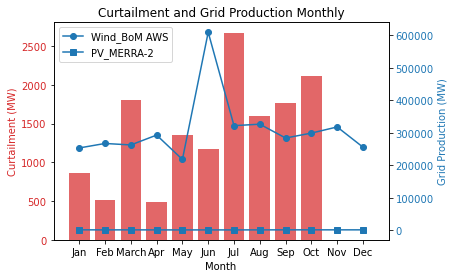

In [1]:
import matplotlib.pyplot as plt
import numpy as np

# Data from the table
months = ['Jan', 'Feb', 'March', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
curtailment = [859.0, 514.7, 1811.3, 490.9, 1350.0, 1166.3, 2674.0, 1596.1, 1761.9, 2112.1, 0.0, 0.0]
wind_grid = [253113.4, 266925.7, 262371.0, 292724.7, 217739.4, 609271.9, 321721.9, 326299.8, 283711.8, 298860.0, 317742.1, 255592.2]
pv_grid = [1090.0423, 958.9515, 1003.7063, 899.0607, 827.8578, 846.8066, 844.9441, 938.5798, 1056.8620, 1085.4799, 1046.0353, 1061.2279]

# Plotting the data
fig, ax1 = plt.subplots()

# First y-axis for curtailment
color = 'tab:red'
ax1.set_xlabel('Month')
ax1.set_ylabel('Curtailment (MW)', color=color)
ax1.bar(months, curtailment, color=color, alpha=0.7)
ax1.tick_params(axis='y', labelcolor=color)

# Second y-axis for wind and PV grid production
ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Grid Production (MW)', color=color)
ax2.plot(months, wind_grid, marker='o', color=color, label='Wind_BoM AWS')
ax2.plot(months, pv_grid, marker='s', color=color, label='PV_MERRA-2')
ax2.tick_params(axis='y', labelcolor=color)

# Add legend and title
plt.title('Curtailment and Grid Production Monthly')
plt.legend(loc='upper left')

# Show the plot
plt.show()


In [30]:
pearson_corr =comb.corr(method='pearson')
pearson_corr

,Curtailment (MW),Wind_grid (MW),PV_grid (MW)
Curtailment (MW),1.000000,0.417006,-0.242549
Wind_grid (MW),0.417006,1.000000,0.388085
PV_grid (MW),-0.242549,0.388085,1.000000


<AxesSubplot:>

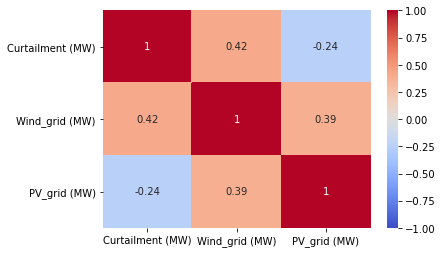

In [2]:
import seaborn as sns
import pandas as pd

# Create a dataframe from the table data
df = pd.DataFrame({'Curtailment (MW)': [1.000000, 0.417006, -0.242549],
                   'Wind_grid (MW)': [0.417006, 1.000000, 0.388085],
                   'PV_grid (MW)': [-0.242549, 0.388085, 1.000000]},
                  index=['Curtailment (MW)', 'Wind_grid (MW)', 'PV_grid (MW)'])

# Create a heatmap using seaborn
sns.heatmap(df, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
